In [1]:
import time
import hydroeval as he
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import sys
from datetime import date
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from scipy.stats import sem
from sklearn.metrics import mean_squared_error
import math
from scipy import stats
import statistics
import os

In [2]:
#make plots appear clean
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0 

### **PMP ASSESSMENT**

In [37]:
## Load Dataset
df = pd.read_csv('./DataFolder/b6_sample_inversion.csv')
# print(df)

In [38]:
## Pass dataset to array
xdf = df.to_xarray()

Duration = xdf['Duration'] 
SN = xdf['SN'] 

Hs_35 = xdf['Hs_35']; Hs_243 = xdf['Hs_243']; Hs_5215 = xdf['Hs_5215']; Hs_12377 = xdf['Hs_12377']  ## HERSHFIELD Station PMP (Annual Max)

Hi_35 = xdf['Hi_35']; Hi_243 = xdf['Hi_243']; Hi_5215 = xdf['Hi_5215']; Hi_12377 = xdf['Hi_12377']  ## HERSHFIELD IMERG PMP (Annual Max)

Hp_35 = xdf['Hp_35']; Hp_243 = xdf['Hp_243']; Hp_5215 = xdf['Hp_5215']; Hp_12377 = xdf['Hp_12377']  ## HERSHFIELD IMERG PMP (Partial Duration)

Mp_35 = xdf['Mp_35']; Mp_243 = xdf['Mp_243']; Mp_5215 = xdf['Mp_5215']; Mp_12377 = xdf['Mp_12377']  ## MODIFIED IMERG PMP (Partial Duration)


#### **Inversion - Plot**

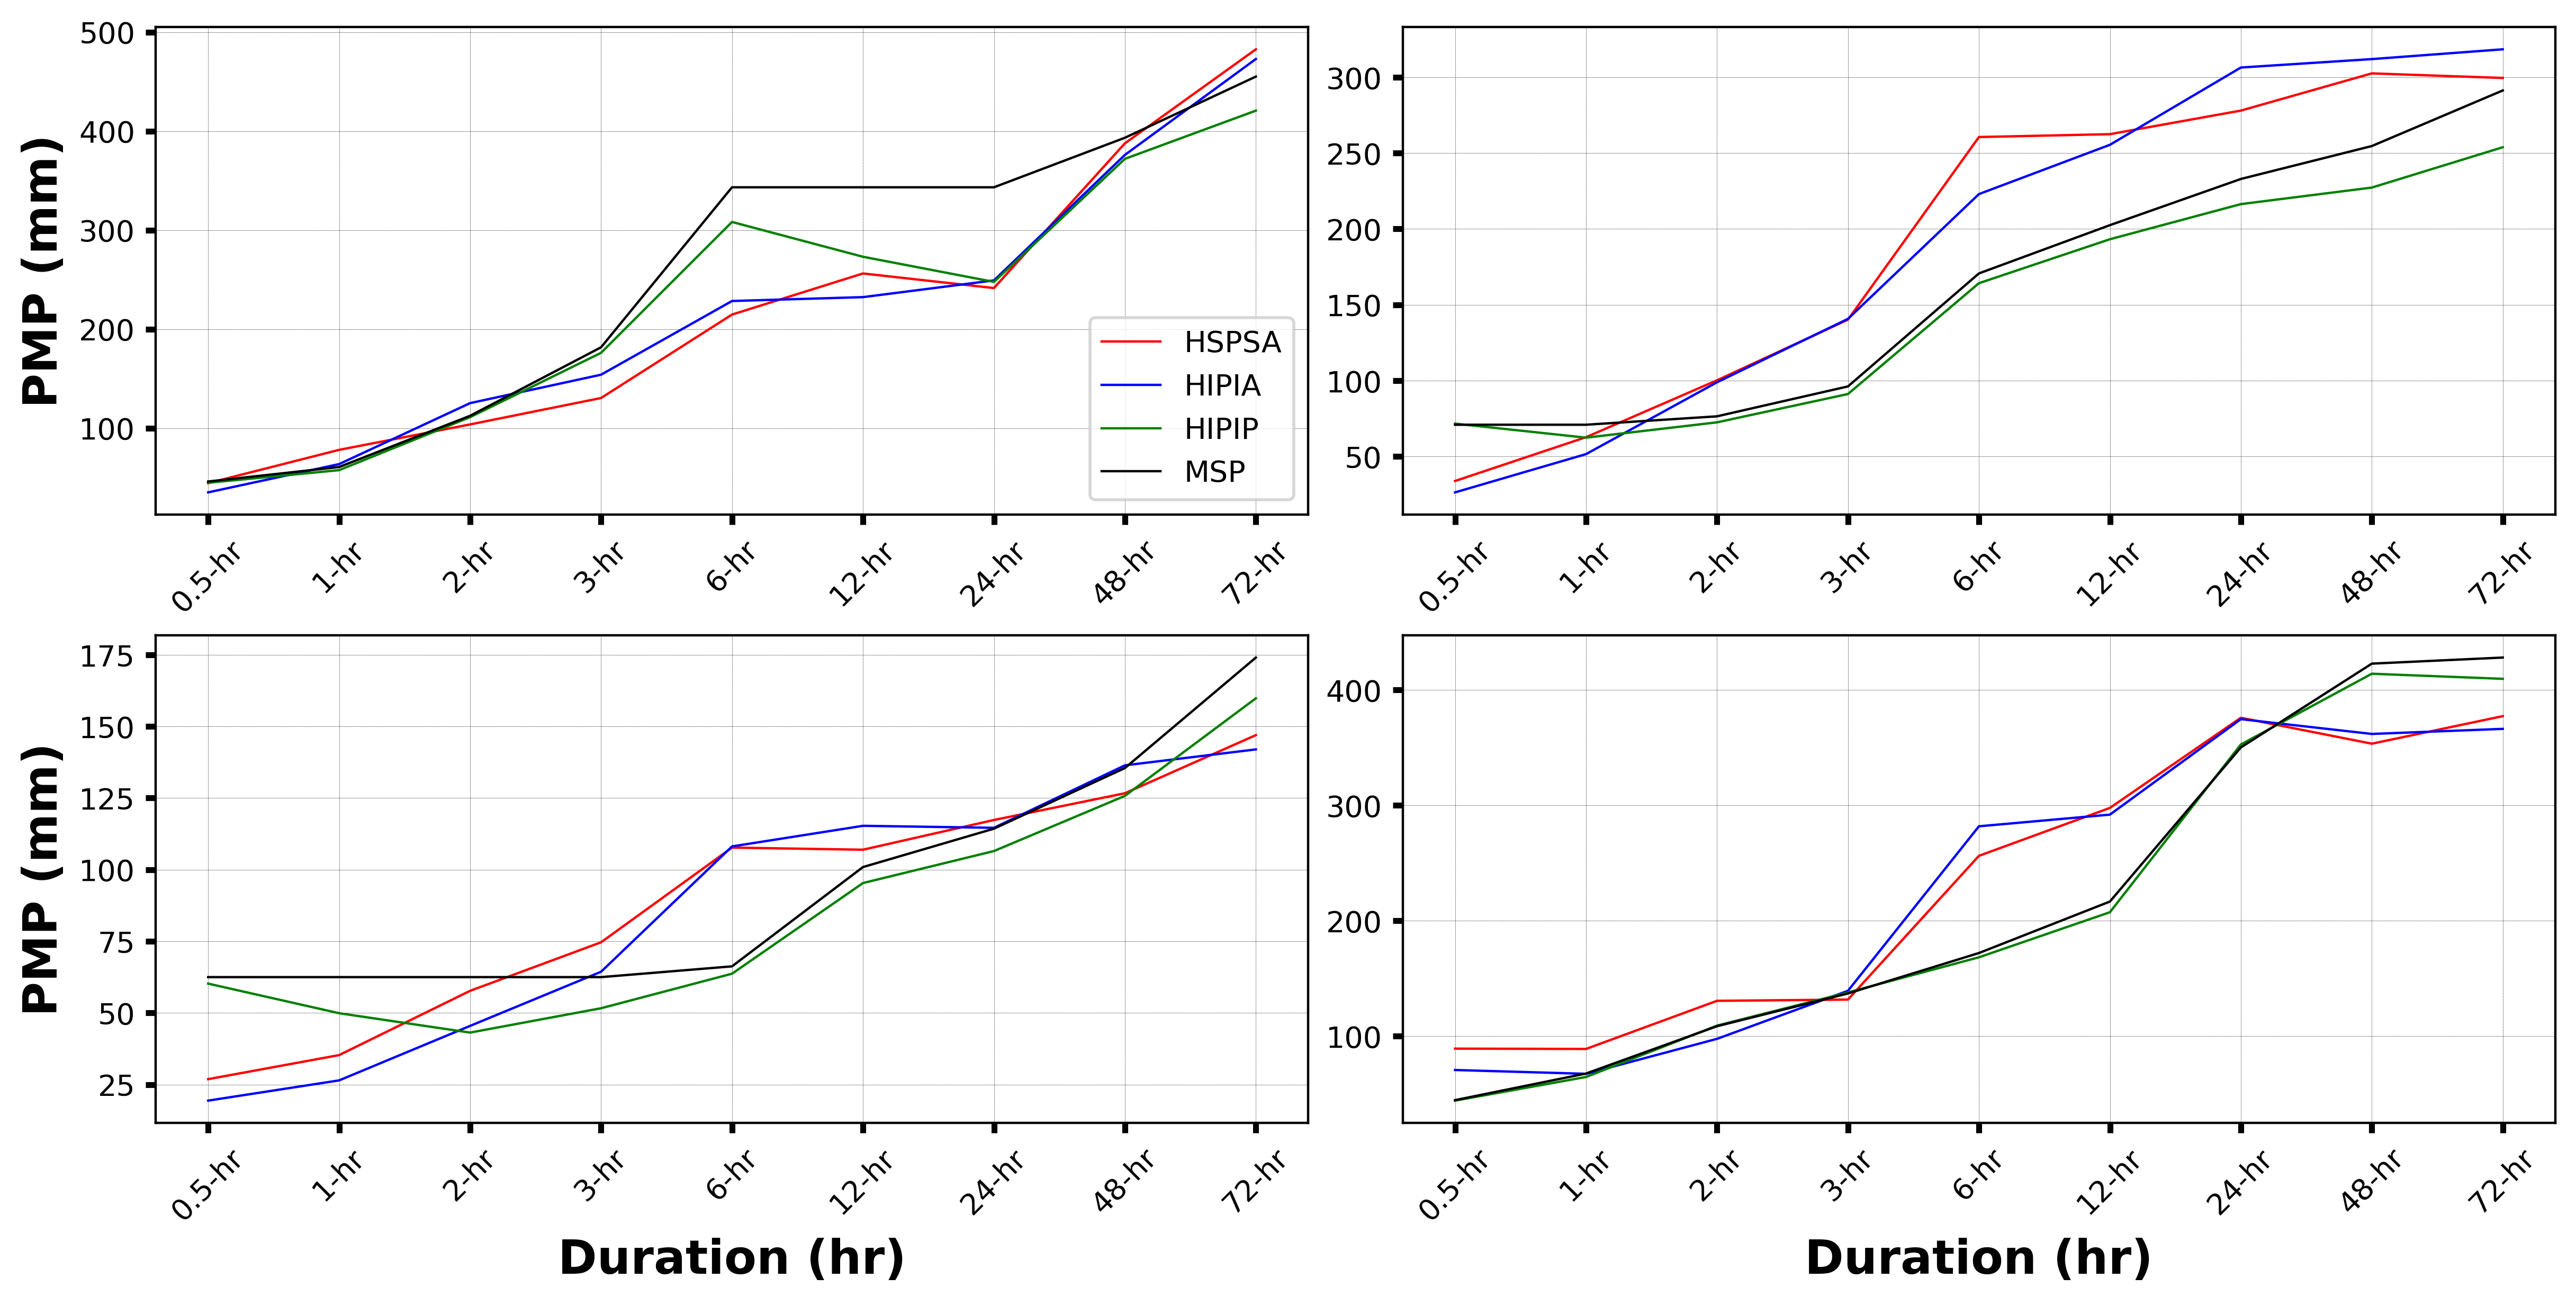

In [68]:
plt.figure(figsize=(12, 6), dpi=400)
titles = ['0.5-hr', '1-hr', '2-hr', '3-hr', '6-hr', '12-hr', '24-hr', '48-hr', '72-hr']

# Top L
plt.subplot(2,2,1) #projection='3d'
plt.plot(SN, Hs_35, color='red', linestyle='-', linewidth=0.8, label = "HSPSA")
plt.plot(SN, Hi_35, color='blue', linestyle='-', linewidth=0.8, label = "HIPIA")
plt.plot(SN, Hp_35, color='green', linestyle='-', linewidth=0.8, label = "HIPIP")
plt.plot(SN, Mp_35, color='black', linestyle='-', linewidth=0.8, label = "MSP")
# plt.xticks(SN, titles,  rotation=45, fontsize=6, color='w') 
plt.xticks(SN, titles,  rotation=45, fontsize=6) 
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.1', color='black', axis='both')
plt.ylabel("PMP (mm)", fontweight='bold', fontsize=16)  
plt.legend(loc=4, fontsize=10)


# Top R
plt.subplot(2,2,2) #projection='3d'
plt.plot(SN, Hs_243, color='red', linestyle='-', linewidth=0.8)
plt.plot(SN, Hi_243, color='blue', linestyle='-', linewidth=0.8)
plt.plot(SN, Hp_243, color='green', linestyle='-', linewidth=0.8)
plt.plot(SN, Mp_243, color='black', linestyle='-', linewidth=0.8)
# plt.xticks(SN, titles,  rotation=45, fontsize=6, color='w') 
plt.xticks(SN, titles,  rotation=45, fontsize=6)
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.1', color='black', axis='both')


# Bottom L
plt.subplot(2,2,3) #projection='3d'
plt.plot(SN, Hs_5215, color='red', linestyle='-', linewidth=0.8)
plt.plot(SN, Hi_5215, color='blue', linestyle='-', linewidth=0.8)
plt.plot(SN, Hp_5215, color='green', linestyle='-', linewidth=0.8)
plt.plot(SN, Mp_5215, color='black', linestyle='-', linewidth=0.8)
# plt.xticks(SN, titles,  rotation=45, fontsize=6, color='w') 
plt.xticks(SN, titles,  rotation=45, fontsize=6)
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.1', color='black', axis='both')
plt.xlabel("Duration (hr)", fontweight='bold', fontsize=16)
plt.ylabel("PMP (mm)", fontweight='bold', fontsize=16)


# Bottom R
plt.subplot(2,2,4) #projection='3d'
plt.plot(SN, Hs_12377, color='red', linestyle='-', linewidth=0.8)
plt.plot(SN, Hi_12377, color='blue', linestyle='-', linewidth=0.8)
plt.plot(SN, Hp_12377, color='green', linestyle='-', linewidth=0.8)
plt.plot(SN, Mp_12377, color='black', linestyle='-', linewidth=0.8)
plt.xticks(SN, titles,  rotation=45, fontsize=6, color='w') 
plt.xticks(SN, titles,  rotation=45, fontsize=6)
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.1', color='black', axis='both')
plt.xlabel("Duration (hr)", fontweight='bold', fontsize=16)


plt.subplots_adjust(hspace=0.3, wspace=0.15)
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0.5)

plt.savefig("Plots/z3_pmp_inversion.png")
plt.show()